# SRCR

## ASSL

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

np.set_printoptions(precision=5, linewidth = 180)

In [2]:
X = np.array([600, 625, 650, 675, 700, 725, 750, 775, 800])

In [3]:
def calc_slope(metric):
    slope = np.array([(metric[i+1] - metric[i])/(X[i+1] - X[i]) for i in range(len(X)-1)])
    return slope

def corrected(metric, offset, slope, r):
    metric[0] *= r*offset
    metric[1:] = [(metric[i-1] + (X[i]-X[i-1])*slope[i-1]) for i in range(1, len(metric))]
    metric = np.array(metric)
    return metric
    
class cr():
    def __init__(self, srcr, tur, nsp):
        self.srcr = srcr        
        self.tur = tur        
        self.nsp = nsp        
        
        self.srcr_slope = calc_slope(self.srcr)
        self.tur_slope = calc_slope(self.tur)
        self.nsp_slope = calc_slope(self.nsp)

    def offset(self, obj):
        srcr_correction = obj.srcr/self.srcr
        tur_correction = obj.tur/self.tur
        nsp_correction = obj.nsp/self.nsp

        return srcr_correction, tur_correction, nsp_correction

    def correction_wrt(self, obj, contri = 1):    # contri : (0, 1]
        srcr_off = obj.srcr[0]/self.srcr[0]
        tur_off = obj.tur[0]/self.tur[0]
        nsp_off = obj.nsp[0]/self.nsp[0]
        
        self.srcr_slope += contri*(obj.srcr_slope - self.srcr_slope)/2
        self.tur_slope += contri*(obj.tur_slope - self.tur_slope)/2
        self.nsp_slope += contri*(obj.nsp_slope - self.nsp_slope)/2

        # r = random.randrange(930, 999)/1000
        r = 1
        self.srcr = corrected(self.srcr, srcr_off, self.srcr_slope, r)
        # while self.srcr > 1: self.srcr*0.95

        self.tur = corrected(self.tur, tur_off, self.tur_slope, r)
        # while self.tur > 1: self.tur*0.95

        self.nsp = corrected(self.nsp, nsp_off, self.nsp_slope, r)         

    def fuzzy(self, obj):
        srcr_correction, tur_correction, nsp_correction = self.offset(obj)
        # r = np.sort(np.array([random.randrange(950, 999)/1000 for _ in range(len(X))]))
        r = 1

        self.srcr *= r*srcr_correction 
        self.tur *= r*tur_correction 
        self.nsp *= r*nsp_correction 

    def scale(self, obj):
        srcr_mpr = (obj.srcr[0]/self.srcr[0] + obj.srcr[-1]/self.srcr[-1])/2
        tur_mpr = (obj.tur[0]/self.tur[0] + obj.tur[-1]/self.tur[-1])/2
        nsp_mpr = (obj.nsp[0]/self.nsp[0] + obj.nsp[-1]/self.nsp[-1])/2

        self.srcr *= srcr_mpr
        self.tur *= tur_mpr
        self.nsp *= nsp_mpr

    def fuzzy_scale(self, obj):
        srcr_correction, tur_correction, nsp_correction = self.offset(obj)
        # r = np.sort(np.array([random.randrange(950, 999)/1000 for _ in range(len(X))]))

        mean, std_dev = 0.975, 0.025
        r = np.sort(np.random.normal(loc=mean, scale=std_dev, size=len(X)))

        self.srcr *= srcr_correction*r
        self.tur *= tur_correction/r    # Because sim.tur > obj.tur
        self.nsp *= nsp_correction*r

In [4]:
class fbr():
    def __init__(self, srcr, tur, nsp, SRCR, TUR, NSP):
        self.paper = cr(SRCR, TUR, NSP)
        self.sim = cr(srcr, tur, nsp)   

In [5]:
SRCR = np.array([0.945, 0.932, 0.92, 0.915, 0.899, 0.89, 0.88, 0.858, 0.845])
TUR = np.array([0.58, 0.59, 0.60, 0.62, 0.63, 0.65, 0.66, 0.665, 0.68])
NSP = np.array([2300, 2360, 2410, 2495, 2520, 2590, 2620, 2660, 2700])

In [6]:
X_my = np.array([400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900])
                   
srcr = np.array([0.873, 0.8734, 0.8462, 0.8261, 0.8112, 0.789, 0.7665, 0.7384, 0.735, 0.7075, 0.6957, 0.6747, 0.6594, 0.6458, 0.6376, 0.6237, 0.6248, 0.6048, 0.5875, 0.5785, 0.5627]) 
tur = np.array([0.5822, 0.6071, 0.6335, 0.6443, 0.6571, 0.6705, 0.6852, 0.6908, 0.7081, 0.7132, 0.7198, 0.7214, 0.7313, 0.7314, 0.7511, 0.7578, 0.774, 0.7687, 0.7756, 0.7816, 0.7856]) 
nsp = np.array([1393.0, 1481.2, 1506.8, 1556.0, 1604.2, 1641.8, 1666.0, 1678.0, 1735.8, 1745.8, 1782.2, 1794.0, 1822.4, 1843.6, 1875.8, 1901.8, 1967.0, 1960.0, 1959.2, 1990.0, 1992.0])

In [7]:
bgn = np.where(X_my == X[0])
end = np.where(X_my == X[-1])

srcr_cut = srcr[bgn[0][0]: end[0][0] + 1]
tur_cut = tur[bgn[0][0]: end[0][0] + 1]
nsp_cut = nsp[bgn[0][0]: end[0][0] + 1]


In [8]:
ASSL = fbr(srcr[bgn[0][0]: end[0][0]+1], tur[bgn[0][0]: end[0][0]+1], nsp[bgn[0][0]: end[0][0]+1], SRCR, TUR, NSP)
ASSL.sim.fuzzy_scale(ASSL.paper)

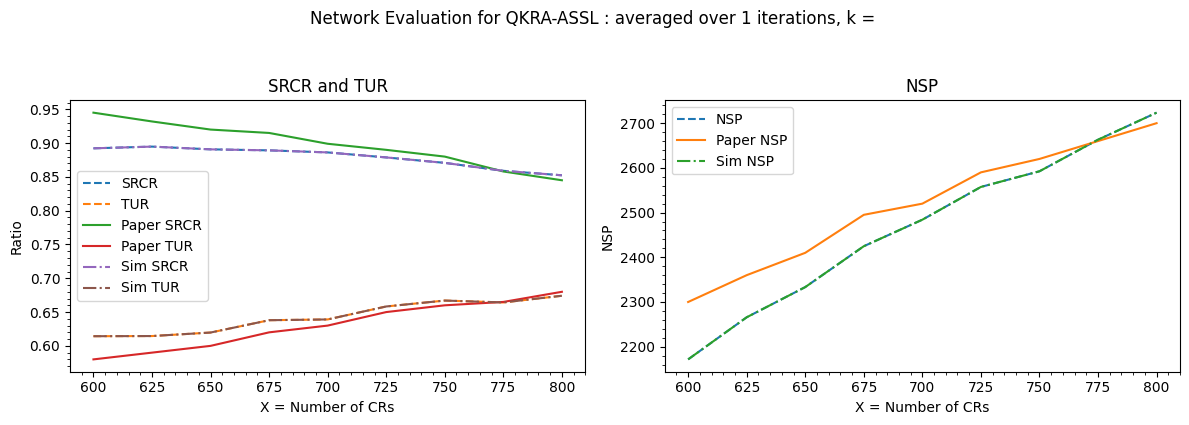

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))    # 1 column for SRCR and TUR, another for NSP

# ax1.scatter(X, srcr_cut, label='SRCR')     # [j_X_i:j_X_f+1]
# ax1.scatter(X, tur_cut, label='TUR')    # [j_X_i:j_X_f+1]
# ax2.scatter(X, nsp_cut, color = 'green')    # [j_X_i:j_X_f+1]


ax1.plot(X, srcr[bgn[0][0]: end[0][0]+1], label='SRCR', linestyle = '--')
ax1.plot(X, tur[bgn[0][0]: end[0][0]+1], label='TUR', linestyle = '--')
ax2.plot(X, nsp[bgn[0][0]: end[0][0]+1], label='NSP', linestyle = '--')

ax1.plot(X, ASSL.paper.srcr, label='Paper SRCR', linestyle = '-')
ax1.plot(X, ASSL.paper.tur, label='Paper TUR', linestyle = '-')
ax2.plot(X, ASSL.paper.nsp, label='Paper NSP', linestyle = '-')

ax1.plot(X, ASSL.sim.srcr, label='Sim SRCR', linestyle = '-.')
ax1.plot(X, ASSL.sim.tur, label='Sim TUR', linestyle = '-.')
ax2.plot(X, ASSL.sim.nsp, label='Sim NSP', linestyle = '-.')


ax1.set_xlabel('X = Number of CRs')
ax1.set_ylabel('Ratio')
ax1.set_title("SRCR and TUR")
ax1.minorticks_on()
ax1.legend(loc='best')

ax2.set_xlabel('X = Number of CRs')
ax2.set_ylabel('NSP')
ax2.set_title("NSP")
ax2.minorticks_on()
ax2.legend()

aslc = 'ASSL'
fig.suptitle(f"Network Evaluation for QKRA-{aslc} : averaged over 1 iterations, k = ", y=1.05)  # Place title above subplots
# fig.legend()

# Show the plot
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

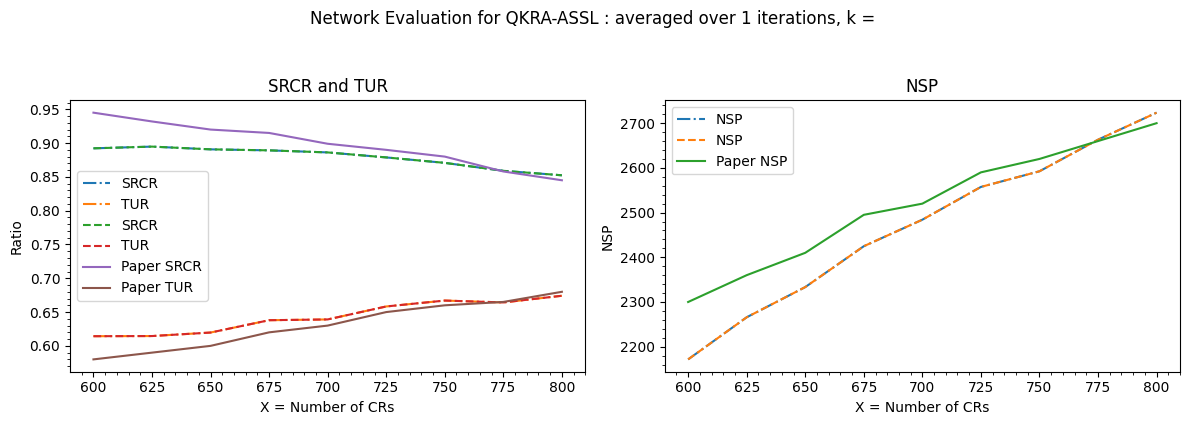

[0.89225 0.89479 0.89073 0.88924 0.88619 0.87879 0.87073 0.85898 0.85236] [0.61429 0.61453 0.61971 0.63796 0.6391  0.65829 0.66702 0.66424 0.67413] [2171.60599 2265.78742 2333.33639 2424.76424 2484.10357 2557.36611 2592.41296 2663.02349 2723.51605]


In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))    # 1 column for SRCR and TUR, another for NSP

ax1.plot(X, srcr_cut, label='SRCR', linestyle = '-.')
ax1.plot(X, tur_cut, label='TUR', linestyle = '-.')
ax2.plot(X, nsp_cut, label='NSP', linestyle = '-.')

ax1.plot(X, srcr[bgn[0][0]: end[0][0]+1], label='SRCR', linestyle = '--')
ax1.plot(X, tur[bgn[0][0]: end[0][0]+1], label='TUR', linestyle = '--')
ax2.plot(X, nsp[bgn[0][0]: end[0][0]+1], label='NSP', linestyle = '--')

ax1.plot(X, SRCR, label='Paper SRCR', linestyle = '-')
ax1.plot(X, TUR, label='Paper TUR', linestyle = '-')
ax2.plot(X, NSP, label='Paper NSP', linestyle = '-')

ax1.set_xlabel('X = Number of CRs')
ax1.set_ylabel('Ratio')
ax1.set_title("SRCR and TUR")
ax1.minorticks_on()
ax1.legend(loc='best')

ax2.set_xlabel('X = Number of CRs')
ax2.set_ylabel('NSP')
ax2.set_title("NSP")
ax2.minorticks_on()
ax2.legend()

aslc = 'ASSL'
fig.suptitle(f"Network Evaluation for QKRA-{aslc} : averaged over 1 iterations, k = ", y=1.05)  # Place title above subplots
# fig.legend()

# Show the plot
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


print(srcr[8:17], tur[8:17], nsp[8:17])

In [11]:
print(srcr_cut, tur_cut, nsp_cut)
print(srcr[8:17], tur[8:17], nsp[8:17])
print(srcr[bgn[0][0]: end[0][0]+1], tur[bgn[0][0]: end[0][0]+1], nsp[bgn[0][0]: end[0][0]+1])

[0.89225 0.89479 0.89073 0.88924 0.88619 0.87879 0.87073 0.85898 0.85236] [0.61429 0.61453 0.61971 0.63796 0.6391  0.65829 0.66702 0.66424 0.67413] [2171.60599 2265.78742 2333.33639 2424.76424 2484.10357 2557.36611 2592.41296 2663.02349 2723.51605]
[0.89225 0.89479 0.89073 0.88924 0.88619 0.87879 0.87073 0.85898 0.85236] [0.61429 0.61453 0.61971 0.63796 0.6391  0.65829 0.66702 0.66424 0.67413] [2171.60599 2265.78742 2333.33639 2424.76424 2484.10357 2557.36611 2592.41296 2663.02349 2723.51605]
[0.89225 0.89479 0.89073 0.88924 0.88619 0.87879 0.87073 0.85898 0.85236] [0.61429 0.61453 0.61971 0.63796 0.6391  0.65829 0.66702 0.66424 0.67413] [2171.60599 2265.78742 2333.33639 2424.76424 2484.10357 2557.36611 2592.41296 2663.02349 2723.51605]


In [12]:
ASSL = fbr(srcr_cut, tur_cut, nsp_cut, SRCR, TUR, NSP)

In [13]:
print(ASSL.sim.srcr_slope, ASSL.sim.tur_slope, ASSL.sim.nsp_slope)
print(ASSL.paper.srcr_slope, ASSL.paper.tur_slope, ASSL.paper.nsp_slope)

[ 1.01888e-04 -1.62392e-04 -5.96811e-05 -1.21924e-04 -2.96322e-04 -3.22077e-04 -4.70355e-04 -2.64624e-04] [ 9.62326e-06  2.07239e-04  7.29818e-04  4.57943e-05  7.67628e-04  3.49155e-04 -1.11135e-04  3.95344e-04] [3.76726 2.70196 3.65711 2.37357 2.9305  1.40187 2.82442 2.4197 ]
[-0.00052 -0.00048 -0.0002  -0.00064 -0.00036 -0.0004  -0.00088 -0.00052] [0.0004 0.0004 0.0008 0.0004 0.0008 0.0004 0.0002 0.0006] [2.4 2.  3.4 1.  2.8 1.2 1.6 1.6]


In [14]:
ASSL.sim.correction_wrt(ASSL.paper, contri = 0)

In [15]:
print(ASSL.sim.srcr_slope, ASSL.sim.tur_slope, ASSL.sim.nsp_slope)
print(ASSL.paper.srcr_slope, ASSL.paper.tur_slope, ASSL.paper.nsp_slope)

[ 1.01888e-04 -1.62392e-04 -5.96811e-05 -1.21924e-04 -2.96322e-04 -3.22077e-04 -4.70355e-04 -2.64624e-04] [ 9.62326e-06  2.07239e-04  7.29818e-04  4.57943e-05  7.67628e-04  3.49155e-04 -1.11135e-04  3.95344e-04] [3.76726 2.70196 3.65711 2.37357 2.9305  1.40187 2.82442 2.4197 ]
[-0.00052 -0.00048 -0.0002  -0.00064 -0.00036 -0.0004  -0.00088 -0.00052] [0.0004 0.0004 0.0008 0.0004 0.0008 0.0004 0.0002 0.0006] [2.4 2.  3.4 1.  2.8 1.2 1.6 1.6]


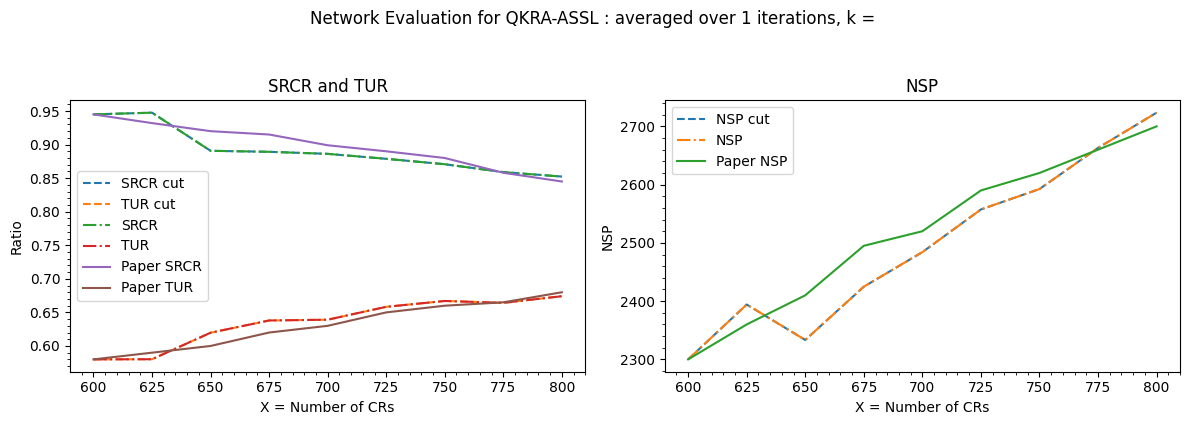

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))    # 1 column for SRCR and TUR, another for NSP

ax1.plot(X, srcr_cut, label='SRCR cut', linestyle = '--')
ax1.plot(X, tur_cut, label='TUR cut', linestyle = '--')
ax2.plot(X, nsp_cut, label='NSP cut', linestyle = '--')

ax1.plot(X, srcr[8:17], label='SRCR', linestyle = '-.')
ax1.plot(X, tur[8:17], label='TUR', linestyle = '-.')
ax2.plot(X, nsp[8:17], label='NSP', linestyle = '-.')

ax1.plot(X, SRCR, label='Paper SRCR', linestyle = '-')
ax1.plot(X, TUR, label='Paper TUR', linestyle = '-')
ax2.plot(X, NSP, label='Paper NSP', linestyle = '-')

ax1.set_xlabel('X = Number of CRs')
ax1.set_ylabel('Ratio')
ax1.set_title("SRCR and TUR")
ax1.minorticks_on()
ax1.legend(loc='best')

ax2.set_xlabel('X = Number of CRs')
ax2.set_ylabel('NSP')
ax2.set_title("NSP")
ax2.minorticks_on()
ax2.legend()

aslc = 'ASSL'
fig.suptitle(f"Network Evaluation for QKRA-{aslc} : averaged over 1 iterations, k = ", y=1.05)  # Place title above subplots
# fig.legend()

# Show the plot
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [17]:
print(f""" {srcr_cut = },\n\n {tur_cut = },\n\n {nsp_cut = }\n\n

 {ASSL = }\n\n = fbr(srcr_cut, tur_cut, nsp_cut, SRCR, TUR, NSP)

 {ASSL.paper.nsp_slope = },\n\n {ASSL.paper.tur_slope = },\n\n {ASSL.paper.srcr_slope = }\n\n

 {ASSL.sim.nsp_slope = },\n\n {ASSL.sim.tur_slope = },\n\n {ASSL.sim.srcr_slope = }\n\n

 {ASSL.sim.srcr = },\n\n {ASSL.sim.tur = }\n\n, {ASSL.sim.nsp = }\n\n""")

 srcr_cut = array([0.945  , 0.94755, 0.89073, 0.88924, 0.88619, 0.87879, 0.87073, 0.85898, 0.85236]),

 tur_cut = array([0.58   , 0.58024, 0.61971, 0.63796, 0.6391 , 0.65829, 0.66702, 0.66424, 0.67413]),

 nsp_cut = array([2300.     , 2394.18143, 2333.33639, 2424.76424, 2484.10357, 2557.36611, 2592.41296, 2663.02349, 2723.51605])



 ASSL = <__main__.fbr object at 0x0000029ABDF1C700>

 = fbr(srcr_cut, tur_cut, nsp_cut, SRCR, TUR, NSP)

 ASSL.paper.nsp_slope = array([2.4, 2. , 3.4, 1. , 2.8, 1.2, 1.6, 1.6]),

 ASSL.paper.tur_slope = array([0.0004, 0.0004, 0.0008, 0.0004, 0.0008, 0.0004, 0.0002, 0.0006]),

 ASSL.paper.srcr_slope = array([-0.00052, -0.00048, -0.0002 , -0.00064, -0.00036, -0.0004 , -0.00088, -0.00052])



 ASSL.sim.nsp_slope = array([3.76726, 2.70196, 3.65711, 2.37357, 2.9305 , 1.40187, 2.82442, 2.4197 ]),

 ASSL.sim.tur_slope = array([ 9.62326e-06,  2.07239e-04,  7.29818e-04,  4.57943e-05,  7.67628e-04,  3.49155e-04, -1.11135e-04,  3.95344e-04]),

 ASSL.sim.srcr_slope = a

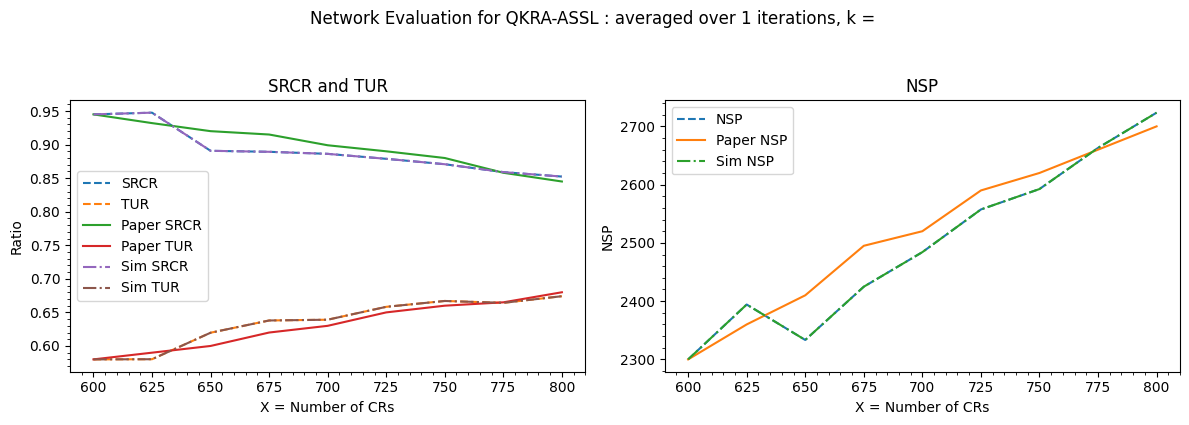

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))    # 1 column for SRCR and TUR, another for NSP

# ax1.scatter(X, srcr_cut, label='SRCR')     # [j_X_i:j_X_f+1]
# ax1.scatter(X, tur_cut, label='TUR')    # [j_X_i:j_X_f+1]
# ax2.scatter(X, nsp_cut, color = 'green')    # [j_X_i:j_X_f+1]

ax1.plot(X, srcr_cut, label='SRCR', linestyle = '--')
ax1.plot(X, tur_cut, label='TUR', linestyle = '--')
ax2.plot(X, nsp_cut, label='NSP', linestyle = '--')
            
ax1.plot(X, ASSL.paper.srcr, label='Paper SRCR', linestyle = '-')
ax1.plot(X, ASSL.paper.tur, label='Paper TUR', linestyle = '-')
ax2.plot(X, ASSL.paper.nsp, label='Paper NSP', linestyle = '-')

ax1.plot(X, ASSL.sim.srcr, label='Sim SRCR', linestyle = '-.')
ax1.plot(X, ASSL.sim.tur, label='Sim TUR', linestyle = '-.')
ax2.plot(X, ASSL.sim.nsp, label='Sim NSP', linestyle = '-.')


ax1.set_xlabel('X = Number of CRs')
ax1.set_ylabel('Ratio')
ax1.set_title("SRCR and TUR")
ax1.minorticks_on()
ax1.legend(loc='best')

ax2.set_xlabel('X = Number of CRs')
ax2.set_ylabel('NSP')
ax2.set_title("NSP")
ax2.minorticks_on()
ax2.legend()

aslc = 'ASSL'
fig.suptitle(f"Network Evaluation for QKRA-{aslc} : averaged over 1 iterations, k = ", y=1.05)  # Place title above subplots
# fig.legend()

# Show the plot
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [19]:
ASSL = fbr(srcr_cut, tur_cut, nsp_cut, SRCR, TUR, NSP)
ASSL.sim.fuzzy(ASSL.paper)
# ASSL.sim.correction_wrt(ASSL.paper, contri = 1)

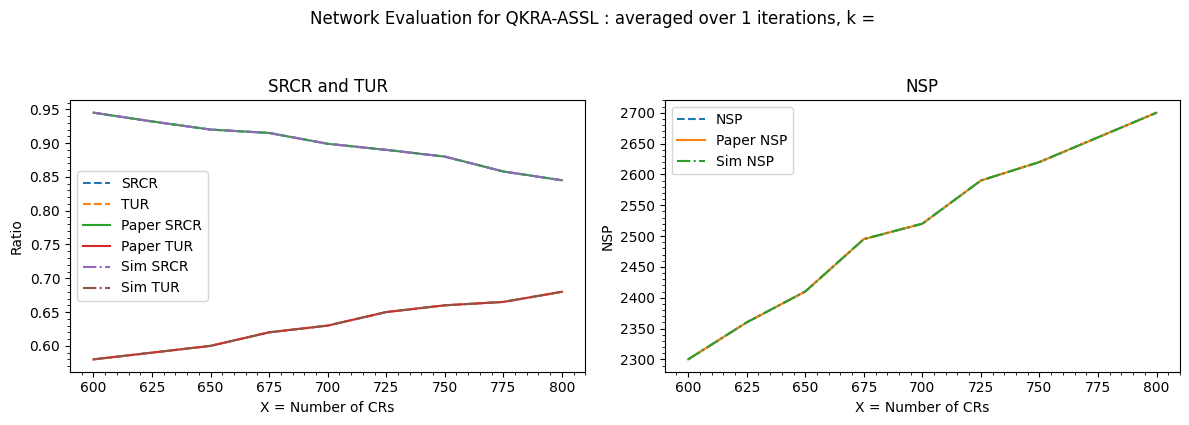

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))    # 1 column for SRCR and TUR, another for NSP

# ax1.scatter(X, srcr_cut, label='SRCR')     # [j_X_i:j_X_f+1]
# ax1.scatter(X, tur_cut, label='TUR')    # [j_X_i:j_X_f+1]
# ax2.scatter(X, nsp_cut, color = 'green')    # [j_X_i:j_X_f+1]

ax1.plot(X, srcr_cut, label='SRCR', linestyle = '--')
ax1.plot(X, tur_cut, label='TUR', linestyle = '--')
ax2.plot(X, nsp_cut, label='NSP', linestyle = '--')
            
ax1.plot(X, ASSL.paper.srcr, label='Paper SRCR', linestyle = '-')
ax1.plot(X, ASSL.paper.tur, label='Paper TUR', linestyle = '-')
ax2.plot(X, ASSL.paper.nsp, label='Paper NSP', linestyle = '-')

ax1.plot(X, ASSL.sim.srcr, label='Sim SRCR', linestyle = '-.')
ax1.plot(X, ASSL.sim.tur, label='Sim TUR', linestyle = '-.')
ax2.plot(X, ASSL.sim.nsp, label='Sim NSP', linestyle = '-.')


ax1.set_xlabel('X = Number of CRs')
ax1.set_ylabel('Ratio')
ax1.set_title("SRCR and TUR")
ax1.minorticks_on()
ax1.legend(loc='best')

ax2.set_xlabel('X = Number of CRs')
ax2.set_ylabel('NSP')
ax2.set_title("NSP")
ax2.minorticks_on()
ax2.legend()

aslc = 'ASSL'
fig.suptitle(f"Network Evaluation for QKRA-{aslc} : averaged over 1 iterations, k = ", y=1.05)  # Place title above subplots
# fig.legend()

# Show the plot
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [21]:
ASSL.sim.srcr, srcr_cut

(array([0.945, 0.932, 0.92 , 0.915, 0.899, 0.89 , 0.88 , 0.858, 0.845]),
 array([0.945, 0.932, 0.92 , 0.915, 0.899, 0.89 , 0.88 , 0.858, 0.845]))

In [22]:
ASSL = fbr(srcr[bgn[0][0]: end[0][0] +1], tur[bgn[0][0]: end[0][0] +1], nsp[bgn[0][0]: end[0][0] +1], SRCR, TUR, NSP)

In [23]:
print(srcr[bgn[0][0]: end[0][0] +1], tur[bgn[0][0]: end[0][0] +1], nsp[bgn[0][0]: end[0][0] +1], SRCR, TUR, NSP)

[0.945 0.932 0.92  0.915 0.899 0.89  0.88  0.858 0.845] [0.58  0.59  0.6   0.62  0.63  0.65  0.66  0.665 0.68 ] [2300. 2360. 2410. 2495. 2520. 2590. 2620. 2660. 2700.] [0.945 0.932 0.92  0.915 0.899 0.89  0.88  0.858 0.845] [0.58  0.59  0.6   0.62  0.63  0.65  0.66  0.665 0.68 ] [2300 2360 2410 2495 2520 2590 2620 2660 2700]


In [24]:
ASSL.sim.scale(ASSL.paper)

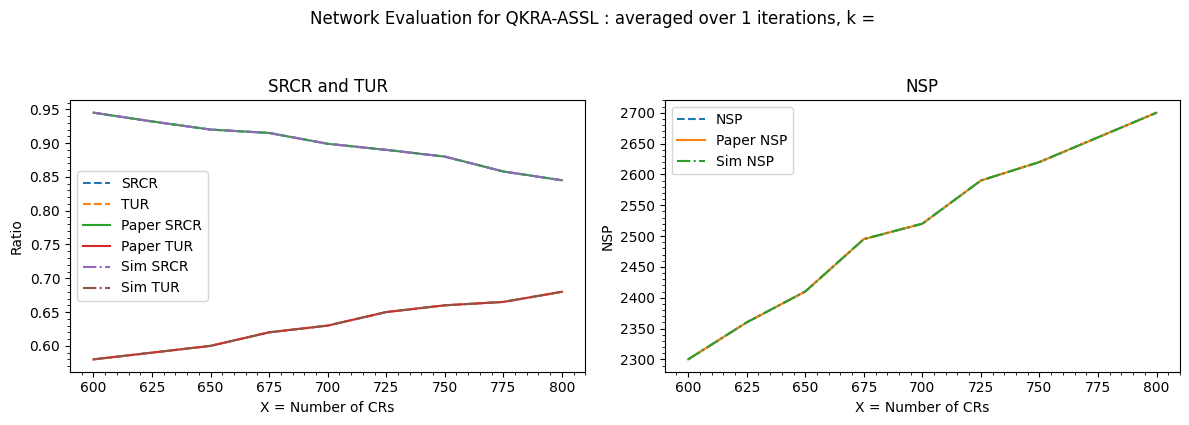

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))    # 1 column for SRCR and TUR, another for NSP

# ax1.scatter(X, srcr_cut, label='SRCR')     # [j_X_i:j_X_f+1]
# ax1.scatter(X, tur_cut, label='TUR')    # [j_X_i:j_X_f+1]
# ax2.scatter(X, nsp_cut, color = 'green')    # [j_X_i:j_X_f+1]


ax1.plot(X, srcr[bgn[0][0]: end[0][0]+1], label='SRCR', linestyle = '--')
ax1.plot(X, tur[bgn[0][0]: end[0][0]+1], label='TUR', linestyle = '--')
ax2.plot(X, nsp[bgn[0][0]: end[0][0]+1], label='NSP', linestyle = '--')

ax1.plot(X, ASSL.paper.srcr, label='Paper SRCR', linestyle = '-')
ax1.plot(X, ASSL.paper.tur, label='Paper TUR', linestyle = '-')
ax2.plot(X, ASSL.paper.nsp, label='Paper NSP', linestyle = '-')

ax1.plot(X, ASSL.sim.srcr, label='Sim SRCR', linestyle = '-.')
ax1.plot(X, ASSL.sim.tur, label='Sim TUR', linestyle = '-.')
ax2.plot(X, ASSL.sim.nsp, label='Sim NSP', linestyle = '-.')


ax1.set_xlabel('X = Number of CRs')
ax1.set_ylabel('Ratio')
ax1.set_title("SRCR and TUR")
ax1.minorticks_on()
ax1.legend(loc='best')

ax2.set_xlabel('X = Number of CRs')
ax2.set_ylabel('NSP')
ax2.set_title("NSP")
ax2.minorticks_on()
ax2.legend()

aslc = 'ASSL'
fig.suptitle(f"Network Evaluation for QKRA-{aslc} : averaged over 1 iterations, k = ", y=1.05)  # Place title above subplots
# fig.legend()

# Show the plot
plt.tight_layout()  # Adjust spacing between subplots
plt.show()